In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [5]:
app_train=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/application_train.csv')
bureau_balance=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/bureau_balance.csv')
bureau=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/bureau.csv')
credit_card_balance=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/credit_card_balance.csv')
#HomeCredit_columns_description=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/HomeCredit_columns_description.csv')
installments_payments=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/installments_payments.csv')
POS_CASH_balance=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/POS_CASH_balance.csv')
previous_application=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/previous_application.csv')
app_test=pd.read_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/application_test.csv')

In [3]:
print('app_train-SK_ID_CURR: '+str(app_train['SK_ID_CURR'].is_unique))
print('bureau_balance-SK_ID_BUREAU: '+str(bureau_balance['SK_ID_BUREAU'].is_unique))
print('bureau-SK_ID_CURR: '+str(bureau['SK_ID_CURR'].is_unique))
print('bureau-SK_ID_BUREAU: '+str(bureau['SK_ID_BUREAU'].is_unique))
print('credit_card_balance:SK_ID_PREV '+str(credit_card_balance['SK_ID_PREV'].is_unique))
print('installments_payments:SK_ID_PREV '+str(installments_payments['SK_ID_PREV'].is_unique))
print('POS_CASH_balance:SK_ID_PREV '+str(POS_CASH_balance['SK_ID_PREV'].is_unique))
print('previous_application: '+str(previous_application['SK_ID_CURR'].is_unique))
print('previous_application:SK_ID_PREV '+str(previous_application['SK_ID_PREV'].is_unique))
print('app_test: '+str(app_test['SK_ID_CURR'].is_unique))

app_train-SK_ID_CURR: True
bureau_balance-SK_ID_BUREAU: False
bureau-SK_ID_CURR: False
bureau-SK_ID_BUREAU: True
credit_card_balance:SK_ID_PREV False
installments_payments:SK_ID_PREV False
POS_CASH_balance:SK_ID_PREV False
previous_application: False
previous_application:SK_ID_PREV True
app_test: True


### TARGET ratio

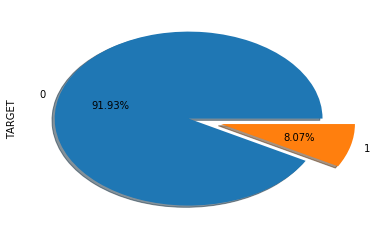

In [7]:
target=app_train['TARGET'].value_counts()
target.plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True)

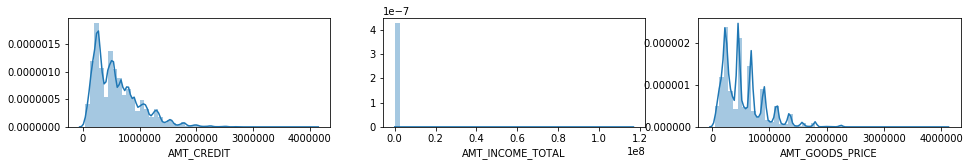

In [107]:
from matplotlib.pyplot import figure
figure(figsize=(16,2))
plt.subplot(1,3,1)
sns.distplot(app_train["AMT_CREDIT"])
plt.subplot(1,3,2)
sns.distplot(app_train["AMT_INCOME_TOTAL"].dropna())
plt.subplot(1,3,3)
sns.distplot(app_train["AMT_GOODS_PRICE"].dropna())

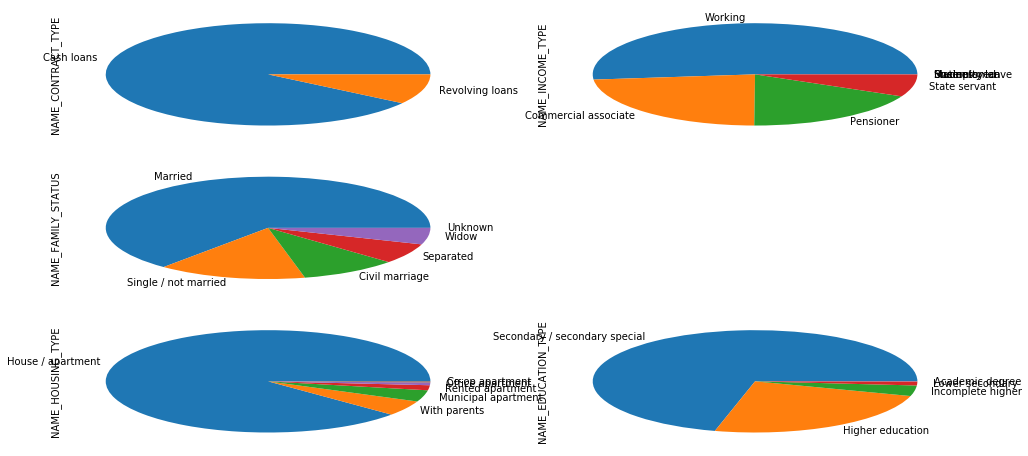

In [112]:
figure(figsize=(16,8))
def pie_plot(field,i):
    temp = app_train[field].value_counts()
    plt.subplot(3,2,i)
    temp.plot.pie()
pie_plot("NAME_CONTRACT_TYPE",1)
pie_plot("NAME_INCOME_TYPE",2)
pie_plot("NAME_FAMILY_STATUS",3)
#pie_plot("NAME_CONTRACT_STATUS",4)
pie_plot("NAME_HOUSING_TYPE",5)
pie_plot("NAME_EDUCATION_TYPE",6)

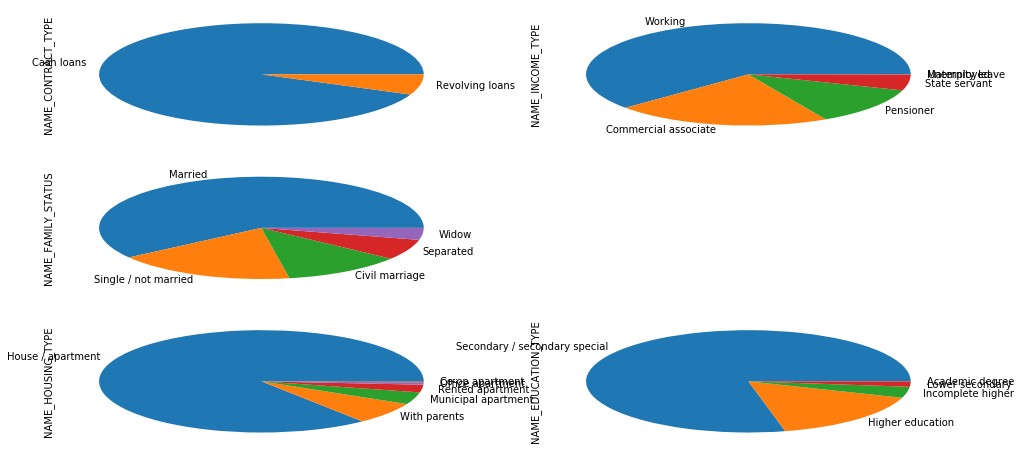

In [116]:
figure(figsize=(16,8))
def pie_plot(field,i):
    temp = app_train[field][app_train.TARGET==1].value_counts()
    plt.subplot(3,2,i)
    temp.plot.pie()
pie_plot("NAME_CONTRACT_TYPE",1)
pie_plot("NAME_INCOME_TYPE",2)
pie_plot("NAME_FAMILY_STATUS",3)
#pie_plot("NAME_CONTRACT_STATUS",4)
pie_plot("NAME_HOUSING_TYPE",5)
pie_plot("NAME_EDUCATION_TYPE",6)

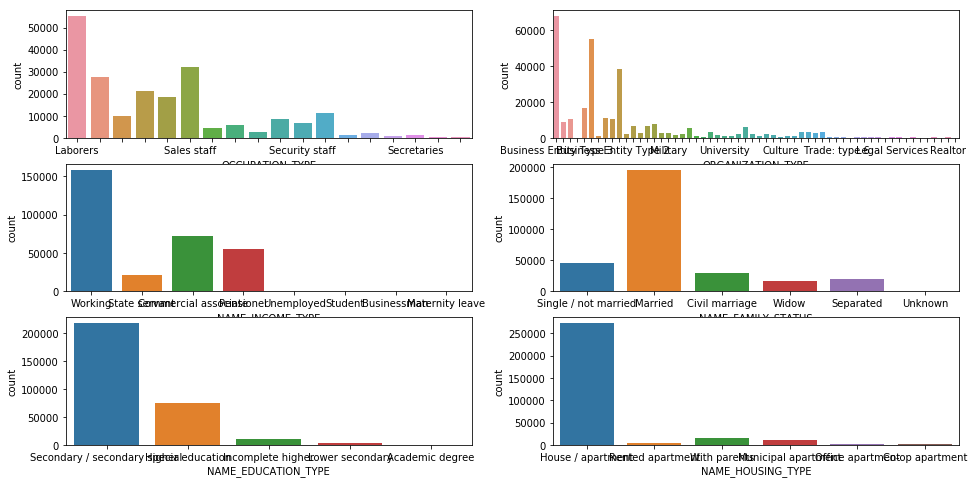

In [130]:
figure(figsize=(16,8))
plt.subplot(3,2,1)
ax=sns.countplot(data=app_train,x='OCCUPATION_TYPE')
for ind, label in enumerate(ax.xaxis.get_ticklabels()):
        if ind % 5 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.subplot(3,2,2)
ax=sns.countplot(data=app_train,x='ORGANIZATION_TYPE')
for ind, label in enumerate(ax.xaxis.get_ticklabels()):
        if ind % 8 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.subplot(3,2,3)
sns.countplot(data=app_train,x='NAME_INCOME_TYPE')
plt.subplot(3,2,4)
sns.countplot(data=app_train,x='NAME_FAMILY_STATUS')
plt.subplot(3,2,5)
sns.countplot(data=app_train,x='NAME_EDUCATION_TYPE')
plt.subplot(3,2,6)
sns.countplot(data=app_train,x='NAME_HOUSING_TYPE')

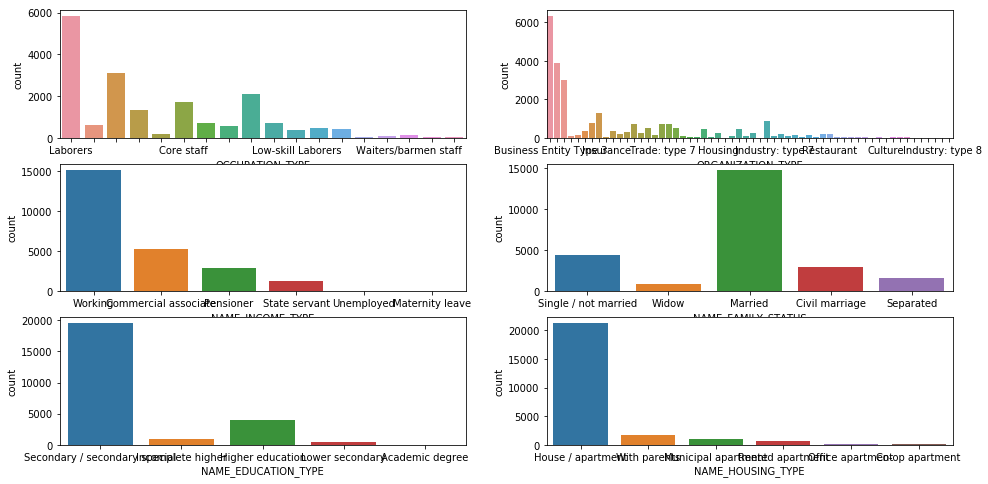

In [131]:
figure(figsize=(16,8))
plt.subplot(3,2,1)
ax=sns.countplot(data=app_train[app_train.TARGET==1],x='OCCUPATION_TYPE')
for ind, label in enumerate(ax.xaxis.get_ticklabels()):
        if ind % 5 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.subplot(3,2,2)
ax=sns.countplot(data=app_train[app_train.TARGET==1],x='ORGANIZATION_TYPE')
for ind, label in enumerate(ax.xaxis.get_ticklabels()):
        if ind % 8 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.subplot(3,2,3)
sns.countplot(data=app_train[app_train.TARGET==1],x='NAME_INCOME_TYPE')
plt.subplot(3,2,4)
sns.countplot(data=app_train[app_train.TARGET==1],x='NAME_FAMILY_STATUS')
plt.subplot(3,2,5)
sns.countplot(data=app_train[app_train.TARGET==1],x='NAME_EDUCATION_TYPE')
plt.subplot(3,2,6)
sns.countplot(data=app_train[app_train.TARGET==1],x='NAME_HOUSING_TYPE')

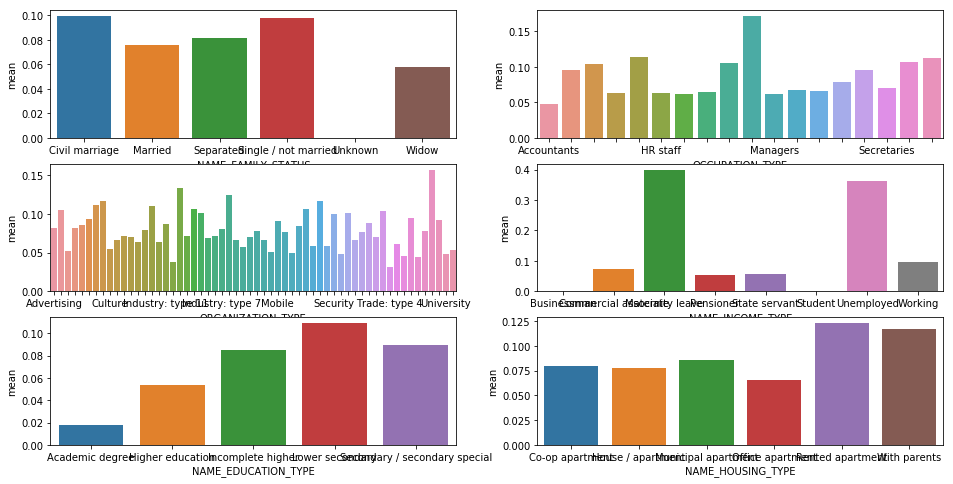

In [133]:
figure(figsize=(16,8))
plt.subplot(3,2,1)
temp=app_train[['NAME_FAMILY_STATUS','TARGET']].groupby(
    'NAME_FAMILY_STATUS')['TARGET'].mean().reset_index(name='mean')
sns.barplot(data=temp,x='NAME_FAMILY_STATUS',y='mean')
plt.subplot(3,2,2)
temp=app_train[['OCCUPATION_TYPE','TARGET']].groupby(
    'OCCUPATION_TYPE')['TARGET'].mean().reset_index(name='mean')
ax=sns.barplot(data=temp,x='OCCUPATION_TYPE',y='mean')
for ind, label in enumerate(ax.xaxis.get_ticklabels()):
        if ind % 5 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.subplot(3,2,3)
temp=app_train[['ORGANIZATION_TYPE','TARGET']].groupby(
    'ORGANIZATION_TYPE')['TARGET'].mean().reset_index(name='mean')
ax=sns.barplot(data=temp,x='ORGANIZATION_TYPE',y='mean')
for ind, label in enumerate(ax.xaxis.get_ticklabels()):
        if ind % 8 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
plt.subplot(3,2,4)
temp=app_train[['NAME_INCOME_TYPE','TARGET']].groupby(
    'NAME_INCOME_TYPE')['TARGET'].mean().reset_index(name='mean')
sns.barplot(data=temp,x='NAME_INCOME_TYPE',y='mean')
plt.subplot(3,2,5)
temp=app_train[['NAME_EDUCATION_TYPE','TARGET']].groupby(
    'NAME_EDUCATION_TYPE')['TARGET'].mean().reset_index(name='mean')
sns.barplot(data=temp,x='NAME_EDUCATION_TYPE',y='mean')
plt.subplot(3,2,6)
temp=app_train[['NAME_HOUSING_TYPE','TARGET']].groupby(
    'NAME_HOUSING_TYPE')['TARGET'].mean().reset_index(name='mean')
sns.barplot(data=temp,x='NAME_HOUSING_TYPE',y='mean')

### Data Manipulation

**Bureau and Bureau balance**

In [11]:
bureau_balance['STATUS_n'] = bureau_balance['STATUS'].map({"5": 0, "4": 1, "3": 2, "2": 3, "1": 4, "0": 5, "C": 6, "X": 7})
bureau_balance=bureau_balance.sort_values(by=['SK_ID_BUREAU','STATUS_n'])
bu_grp=bureau_balance.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE':['mean','min','max','size'],'STATUS':'first'})
bu_grp.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bu_grp.columns.tolist()])
bu_grp=bu_grp.add_prefix('BU_bal_')
bb=bureau.join(bu_grp,how='left', on='SK_ID_BUREAU')
bb['STATUS_n'] = bb['BU_bal_STATUS_FIRST'].map({"5": 0, "4": 1, "3": 2, "2": 3, "1": 4, "0": 5, "C": 6, "X": 7})
bb=bb.sort_values(by=['SK_ID_CURR','STATUS_n'])
num_aggregations = {
        'DAYS_CREDIT': [ 'mean', 'var'],
        'DAYS_CREDIT_ENDDATE': [ 'mean'],
        'DAYS_CREDIT_UPDATE': ['mean'],
        'CREDIT_DAY_OVERDUE': ['mean'],
        'AMT_CREDIT_MAX_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_DEBT': [ 'mean', 'sum'],
        'AMT_CREDIT_SUM_OVERDUE': ['mean'],
        'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
        'AMT_ANNUITY': ['max', 'mean'],
        'CNT_CREDIT_PROLONG': ['sum'],
        'BU_bal_MONTHS_BALANCE_MIN': ['min'],
        'BU_bal_MONTHS_BALANCE_MAX': ['max'],
        'BU_bal_MONTHS_BALANCE_SIZE': ['mean', 'sum'],
        'BU_bal_MONTHS_BALANCE_MEAN' : ['mean'],
        'BU_bal_STATUS_FIRST':'first'
    }
bb_final=bb.groupby('SK_ID_CURR').agg(num_aggregations)
bb_final.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_final.columns.tolist()])
bb_final=bb_final.add_prefix('BB_')

**POS_CASH_balance**

In [12]:
agg_pos={'MONTHS_BALANCE':['max','mean'],'SK_DPD':['max','mean'],'SK_DPD_DEF':['max','mean']}
POS_CASH_f=POS_CASH_balance.groupby('SK_ID_CURR').agg(agg_pos)
POS_CASH_f.columns = pd.Index([e[0] + "_" + e[1].upper() for e in POS_CASH_f.columns.tolist()])
POS_CASH_f=POS_CASH_f.add_prefix('PC_')

**installments_payments**

In [13]:
installments_payments['DPD_DAYS']=installments_payments['DAYS_INSTALMENT']-installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['DPD_AMT']=installments_payments['AMT_PAYMENT']-installments_payments['AMT_INSTALMENT']
agg_install={'DPD_DAYS':['min','mean'],'DPD_AMT':['min','mean']}
install_fial=installments_payments.groupby('SK_ID_CURR').agg(agg_install)
install_fial.columns = pd.Index([e[0] + "_" + e[1].upper() for e in install_fial.columns.tolist()])
install_fial=install_fial.add_prefix('INST_')

**credit_card_balance**

In [14]:
credit_card_balance['DPD_AMT_MIN_PAY']=credit_card_balance['AMT_PAYMENT_TOTAL_CURRENT']-credit_card_balance['AMT_INST_MIN_REGULARITY']
credit_card_balance['DPD_AMT_BAL']=credit_card_balance['AMT_PAYMENT_TOTAL_CURRENT']-credit_card_balance['AMT_BALANCE']
cc_mean=credit_card_balance.groupby('SK_ID_CURR').agg('mean')
cc_max=credit_card_balance.groupby('SK_ID_CURR').agg({'DPD_AMT_MIN_PAY':'min','DPD_AMT_BAL':'min'})
credit_card_final=pd.concat([cc_mean.add_suffix('_mean'),cc_max.add_suffix('_min')],axis=0)
credit_card_final=credit_card_final.add_prefix('CC_')

/Users/renfeigao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


**previous_application**

In [15]:
previous_application['APP_CREDIT_PERC'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']
prev_num_aggregations = {
        'AMT_ANNUITY': [ 'max', 'mean'],
        'AMT_APPLICATION': ['min', 'mean'],
        'AMT_CREDIT': ['min', 'max', 'mean'],
        'APP_CREDIT_PERC': ['min', 'max', 'mean'],
        'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
        'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
        'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
        'DAYS_DECISION': ['min', 'max', 'mean'],
        'CNT_PAYMENT': ['mean', 'sum'],
    }
previous_application_f=previous_application.groupby('SK_ID_CURR').agg(prev_num_aggregations)
previous_application_f.columns = pd.Index([e[0] + "_" + e[1].upper() for e in previous_application_f.columns.tolist()])
previous_application_f=previous_application_f.add_prefix('PA_')

**app train&app test**

In [16]:
app_train['NEW_CREDIT_TO_ANNUITY_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_ANNUITY']
app_train['NEW_CREDIT_TO_GOODS_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_GOODS_PRICE']
#app_train['NEW_DOC_IND_KURT'] = app_train[docs].kurtosis(axis=1)
#app_train['NEW_LIVE_IND_SUM'] = app_train[live].sum(axis=1)
app_train['NEW_INC_PER_CHLD'] = app_train['AMT_INCOME_TOTAL'] / (1 + app_train['CNT_CHILDREN'])
#app_train['NEW_INC_BY_ORG'] = app_train['ORGANIZATION_TYPE'].map(inc_by_org)
app_train['NEW_EMPLOY_TO_BIRTH_RATIO'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['NEW_ANNUITY_TO_INCOME_RATIO'] = app_train['AMT_ANNUITY'] / (1 + app_train['AMT_INCOME_TOTAL'])
app_train['NEW_SOURCES_PROD'] = app_train['EXT_SOURCE_1'] * app_train['EXT_SOURCE_2'] * app_train['EXT_SOURCE_3']
app_train['NEW_EXT_SOURCES_MEAN'] = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_train['NEW_SCORES_STD'] = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
app_train['NEW_SCORES_STD'] = app_train['NEW_SCORES_STD'].fillna(app_train['NEW_SCORES_STD'].mean())
app_train['NEW_CAR_TO_BIRTH_RATIO'] = app_train['OWN_CAR_AGE'] / app_train['DAYS_BIRTH']
app_train['NEW_CAR_TO_EMPLOY_RATIO'] = app_train['OWN_CAR_AGE'] / app_train['DAYS_EMPLOYED']
app_train['NEW_PHONE_TO_BIRTH_RATIO'] = app_train['DAYS_LAST_PHONE_CHANGE'] / app_train['DAYS_BIRTH']
app_train['NEW_PHONE_TO_BIRTH_RATIO'] = app_train['DAYS_LAST_PHONE_CHANGE'] / app_train['DAYS_EMPLOYED']
app_train['NEW_CREDIT_TO_INCOME_RATIO'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']

In [17]:
app_test['NEW_CREDIT_TO_ANNUITY_RATIO'] = app_test['AMT_CREDIT'] / app_test['AMT_ANNUITY']
app_test['NEW_CREDIT_TO_GOODS_RATIO'] = app_test['AMT_CREDIT'] / app_test['AMT_GOODS_PRICE']
#app_test['NEW_DOC_IND_KURT'] = app_test[docs].kurtosis(axis=1)
#app_test['NEW_LIVE_IND_SUM'] = app_test[live].sum(axis=1)
app_test['NEW_INC_PER_CHLD'] = app_test['AMT_INCOME_TOTAL'] / (1 + app_test['CNT_CHILDREN'])
#app_test['NEW_INC_BY_ORG'] = app_test['ORGANIZATION_TYPE'].map(inc_by_org)
app_test['NEW_EMPLOY_TO_BIRTH_RATIO'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['NEW_ANNUITY_TO_INCOME_RATIO'] = app_test['AMT_ANNUITY'] / (1 + app_test['AMT_INCOME_TOTAL'])
app_test['NEW_SOURCES_PROD'] = app_test['EXT_SOURCE_1'] * app_test['EXT_SOURCE_2'] * app_test['EXT_SOURCE_3']
app_test['NEW_EXT_SOURCES_MEAN'] = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_test['NEW_SCORES_STD'] = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
app_test['NEW_SCORES_STD'] = app_test['NEW_SCORES_STD'].fillna(app_test['NEW_SCORES_STD'].mean())
app_test['NEW_CAR_TO_BIRTH_RATIO'] = app_test['OWN_CAR_AGE'] / app_test['DAYS_BIRTH']
app_test['NEW_CAR_TO_EMPLOY_RATIO'] = app_test['OWN_CAR_AGE'] / app_test['DAYS_EMPLOYED']
app_test['NEW_PHONE_TO_BIRTH_RATIO'] = app_test['DAYS_LAST_PHONE_CHANGE'] / app_test['DAYS_BIRTH']
app_test['NEW_PHONE_TO_BIRTH_RATIO'] = app_test['DAYS_LAST_PHONE_CHANGE'] / app_test['DAYS_EMPLOYED']
app_test['NEW_CREDIT_TO_INCOME_RATIO'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']

**Merge ALL data**

In [81]:
df=app_train.join(previous_application_f, how='left').join(POS_CASH_f,how='left').join(install_fial,how='left').join(
    credit_card_final,how='left').join(bb_final,how='left')
df_test=app_test.join(previous_application_f, how='left').join(POS_CASH_f,how='left').join(install_fial,how='left').join(
    credit_card_final,how='left').join(bb_final,how='left')
df=df.replace([np.inf, -np.inf], np.nan)
####because the time is limited, just fill 0 value roughly
df=df.fillna(0)
df.BB_BU_bal_STATUS_FIRST_FIRST=df.BB_BU_bal_STATUS_FIRST_FIRST.replace(0,'0')
df_test=df_test.replace([np.inf, -np.inf], np.nan)
df_test=df_test.fillna(0)
df=df.drop(columns=['ORGANIZATION_TYPE'])
df_test=df_test.drop(columns=['ORGANIZATION_TYPE'])
df_final=pd.get_dummies(df,drop_first=True)
df_test_final=pd.get_dummies(df_test,drop_first=True)

### Random Forest to output feature importance

In [ ]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=10)
rf.fit(Xtrain,ytrain)
feature_importances = pd.DataFrame(rf.feature_importances_,index = Xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [34]:
feature_importances.head(10)

,importance
NEW_EXT_SOURCES_MEAN,0.174613
EXT_SOURCE_2,0.083719
EXT_SOURCE_3,0.071969
NEW_SOURCES_PROD,0.032099
NEW_CREDIT_TO_GOODS_RATIO,0.023506
DAYS_BIRTH,0.021866
EXT_SOURCE_1,0.021462
NEW_SCORES_STD,0.018279
NEW_CREDIT_TO_ANNUITY_RATIO,0.016437
DAYS_EMPLOYED,0.015776


### Random Forest

In [51]:
df_final[['TARGET','NEW_EXT_SOURCES_MEAN']].info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367716 entries, 0 to 307510
Data columns (total 2 columns):
TARGET                  367716 non-null int64
NEW_EXT_SOURCES_MEAN    367716 non-null float64
dtypes: float64(1), int64(1)
memory usage: 8.4 MB


In [82]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(df_final.drop(columns=['TARGET']),df_final['TARGET'],
                                           stratify=df_final['TARGET'],test_size=0.33,random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
clfForest = RandomForestClassifier(n_estimators=1000)
parameters = {"max_depth": [5,10,20,30]}#slow
gs = GridSearchCV(clfForest, param_grid=parameters, cv=5, n_jobs=4, scoring='roc_auc')

/Users/renfeigao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/renfeigao/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [25]:
gs.fit(Xtrain,ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_depth': [5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='roc_auc', verbose=0)

In [26]:
print("BEST", gs.best_params_, gs.best_score_, gs.grid_scores_)

BEST {'max_depth': 10} 0.7579686875232959 [mean: 0.73652, std: 0.00314, params: {'max_depth': 5}, mean: 0.75797, std: 0.00416, params: {'max_depth': 10}]


In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = Xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

### XGboost

In [84]:
import xgboost as xgb
from xgboost import XGBClassifier
clf_xg = XGBClassifier(learning_rate =0.01, n_estimators=10000, max_depth=4, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, 
                       objective= 'binary:logistic', 
            nthread=4, scale_pos_weight=2.5, seed=27, reg_lambda = 1.2)
clf_xg.fit(Xtrain, ytrain, eval_set=[(Xtrain, ytrain), (Xtest, ytest)], 
                eval_metric= 'auc', verbose= 100, early_stopping_rounds= 200)

[0]	validation_0-auc:0.682886	validation_1-auc:0.674788
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.737989	validation_1-auc:0.729835
[200]	validation_0-auc:0.743798	validation_1-auc:0.73528
[300]	validation_0-auc:0.751664	validation_1-auc:0.741816
[400]	validation_0-auc:0.75953	validation_1-auc:0.747948
[500]	validation_0-auc:0.765425	validation_1-auc:0.752063
[600]	validation_0-auc:0.770257	validation_1-auc:0.755258
[700]	validation_0-auc:0.774109	validation_1-auc:0.757575
[800]	validation_0-auc:0.777497	validation_1-auc:0.759493
[900]	validation_0-auc:0.780706	validation_1-auc:0.761082
[1000]	validation_0-auc:0.78356	validation_1-auc:0.762417
[1100]	validation_0-auc:0.786183	validation_1-auc:0.763645
[1200]	validation_0-auc:0.788746	validation_1-auc:0.764753
[1300]	validation_0-auc:0.791007	validation_1-auc:0.765635
[1400]	validation_0-auc:0.79325

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1.2, scale_pos_weight=2.5, seed=27,
       silent=True, subsample=0.8)

In [90]:
from sklearn.metrics import classification_report, roc_curve, auc,roc_auc_score
train_pred_prob=clf_xg.predict_proba(Xtrain)[:,1]
fpr,tpr,thresholds = roc_curve(ytrain,train_pred_prob)
train_auc=roc_auc_score(ytrain,train_pred_prob)
test_pred_prob=clf_xg.predict_proba(Xtest)[:,1]
fpr_test,tpr_test,thresholds_test = roc_curve(ytest,test_pred_prob)
test_auc=roc_auc_score(ytest,test_pred_prob)

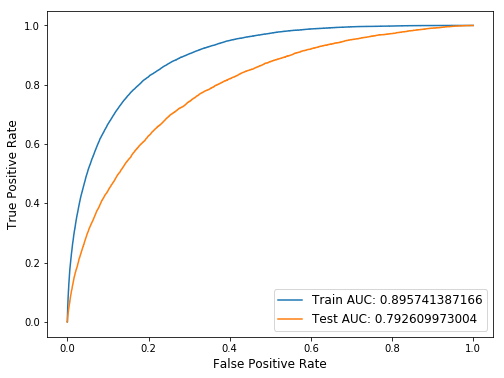

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, label='Train AUC: ' + str(train_auc))
ax.plot(fpr_test, tpr_test, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

In [92]:
roc_auc_score(ytrain,train_pred_prob)

0.89574138716599272

In [93]:
roc_auc_score(ytest,test_pred_prob)

0.79260997300442282

In [99]:
from pandas import Series
i = np.arange(len(fpr_test))
df_threshold=pd.DataFrame({'fpr':Series(fpr_test,index=i),'tpr':Series(tpr_test,index=i),
                          'threshold':Series(thresholds_test,index=i)})
df_threshold[(df_threshold.fpr>0.4)&(df_threshold.fpr<0.401)]

,fpr,tpr,threshold
12728,0.400267,0.820196,0.126006
12729,0.400267,0.820298,0.126004
12730,0.400437,0.820298,0.125966
12731,0.400437,0.820400,0.125964
12732,0.400814,0.820400,0.125884
12733,0.400814,0.820502,0.125878
12734,0.400966,0.820502,0.125826
12735,0.400966,0.820604,0.125823


In [128]:
for i in range (len(test_pred_prob)):
    if test_pred_prob[i] >= 0.125:
        test_pred_prob[i] =1
    else:
        test_pred_prob[i] =0
from sklearn.metrics import confusion_matrix
tnt, fpt, fnt, tpt = confusion_matrix(ytest, test_pred_prob).ravel()
print('test',tnt, fpt, fnt, tpt)
print('Loan not passed',(tpt+fpt)/len(ytest))
print('bad loan detected',tpt/(tpt+fnt))
print('default loan ratio',fnt/(tnt+fnt))
#sklearn matrix.....recall precision. classification_report

test 66545 45008 1747 8047
Loan not passed 0.43721723652
bad loan detected 0.821625484991
default loan ratio 0.0255813272418


In [105]:
feature_importances = pd.DataFrame(clf_xg.feature_importances_,
                                   index = Xtrain.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(10)

,importance
NEW_CREDIT_TO_ANNUITY_RATIO,0.043897
NEW_EXT_SOURCES_MEAN,0.028536
DAYS_BIRTH,0.027886
EXT_SOURCE_2,0.022226
DAYS_REGISTRATION,0.020465
DAYS_ID_PUBLISH,0.020183
NEW_SCORES_STD,0.019592
EXT_SOURCE_3,0.019180
NEW_EMPLOY_TO_BIRTH_RATIO,0.019108
SK_ID_CURR,0.018372


In [88]:
df_test_final['CODE_GENDER_XNA']=0
df_test_final['NAME_FAMILY_STATUS_Unknown']=0
df_test_final['NAME_INCOME_TYPE_Maternity leave']=0
df_test_final1=df_test_final.reindex(Xtrain.columns, axis=1)
ypred = clf_xg.predict_proba(df_test_final1)
y_pred=pd.DataFrame(ypred)
y_pred['SK_ID_CURR']=df_test_final['SK_ID_CURR']
y_pred.to_csv('/Users/renfeigao/.kaggle/competitions/home-credit-default-risk/test_predict20180709.csv')